# MNIST : Exploration of CNN

### Introduction

On a previous Notebook, we went through standard DNN to classify MNIST dataset. We explored some parameter to improve it (topology, normalization, activation functions and optimizer). In this Notebook we won't do the same with a CNN network but instead we will try to visualize the impact of filters on the output. To simplify code, I used Keras instead of Tensorflow as it allows quickly to set up model and evaluate a specific layer/filter easily.

To know more about Convolutionnal Neural Network, you refer to <a href="https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/" target="_blank">this introduction</a>.



### Model

For this part, we will setup a Standard CNN well known for MNIST which perform highly better than the previous DNN (accuracy was around 88% and now, our model will be above 99%). To do so, we will first have a first Convolutionnal Layer with 32 filters of 3x3. As output our image will be break into 32 filtered images of 26x26 pixels. After, the picture will pass through another CNN of 64 filters of 3x3 pixels. The output will be 64 images of 24x24 pixels. Then, all pictures will pass in the MaxPooling Layer of 2x2 to end up with a 64 pictures of 12x12 pixels. All those 64 images will be flattened in a big vector (1, 14*14*64) and then be classified with a standard DNN. A dropout is also used to increase performances on the model and avoid overfitting.

The training will be done on 12 epochs (the model is trained after 10 epochs usually). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

%matplotlib inline

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

We can now load the dataset for training and test

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

then we need to reshape it in order to have a proper tensor

In [4]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

Quick MinMax Normalization

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


And we can do the model

In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
model = Sequential()
model.add(Conv2D(filters=32, 
                 kernel_size=(3, 3),
                 strides=1,
                 padding="SAME",
                 activation='relu',
                 input_shape=input_shape,
                 name="conv1"
                ))
model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 strides=1,
                 padding="SAME",
                 activation='relu', 
                 name="conv2"
                ))
model.add(MaxPooling2D(pool_size=(2, 2), name="MaxPool"))
model.add(Dropout(0.25))
model.add(Flatten(name="flat"))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

then we can compile it usign crossentropy as Loss Function and AdaDelta as Optimizer (Optimisation of Adagrad). Of course, the metric remains the accuracy of the model

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

we now can fit the model and check the accuracy

In [9]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 38s 640us/step - loss: 0.2724 - acc: 0.9158 - val_loss: 0.0749 - val_acc: 0.9747
Epoch 2/12
60000/60000 [==============================] - 8s 127us/step - loss: 0.0805 - acc: 0.9763 - val_loss: 0.0444 - val_acc: 0.9856
Epoch 3/12
60000/60000 [==============================] - 8s 126us/step - loss: 0.0592 - acc: 0.9821 - val_loss: 0.0395 - val_acc: 0.9874
Epoch 4/12
60000/60000 [==============================] - 8s 126us/step - loss: 0.0488 - acc: 0.9853 - val_loss: 0.0350 - val_acc: 0.9879
Epoch 5/12
60000/60000 [==============================] - 8s 126us/step - loss: 0.0411 - acc: 0.9875 - val_loss: 0.0328 - val_acc: 0.9887
Epoch 6/12
60000/60000 [==============================] - 8s 125us/step - loss: 0.0352 - acc: 0.9892 - val_loss: 0.0327 - val_acc: 0.9893
Epoch 7/12
60000/60000 [==============================] - 8s 126us/step - loss: 0.0314 - acc: 0.9903 - val_loss: 0.0299 -

Slightly above 99%, it's a very good score for such a simple model and the training time is pretty quick

### Exploration

Now, the model is trained, we can visualise filters based on the value of each cell. We first gonna visualise the first level of layer which is usually filtering simple features. The deeper we go, the more abstract features it detects. You can visualize filters from Deep Neural Network on <a href="https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html" target="_blank">this page</a>. We can see on this page that first filters detect textures, then lines/dots then quares/circle/... to finish with strange shapes

Conv2D
(3, 3, 1, 32)


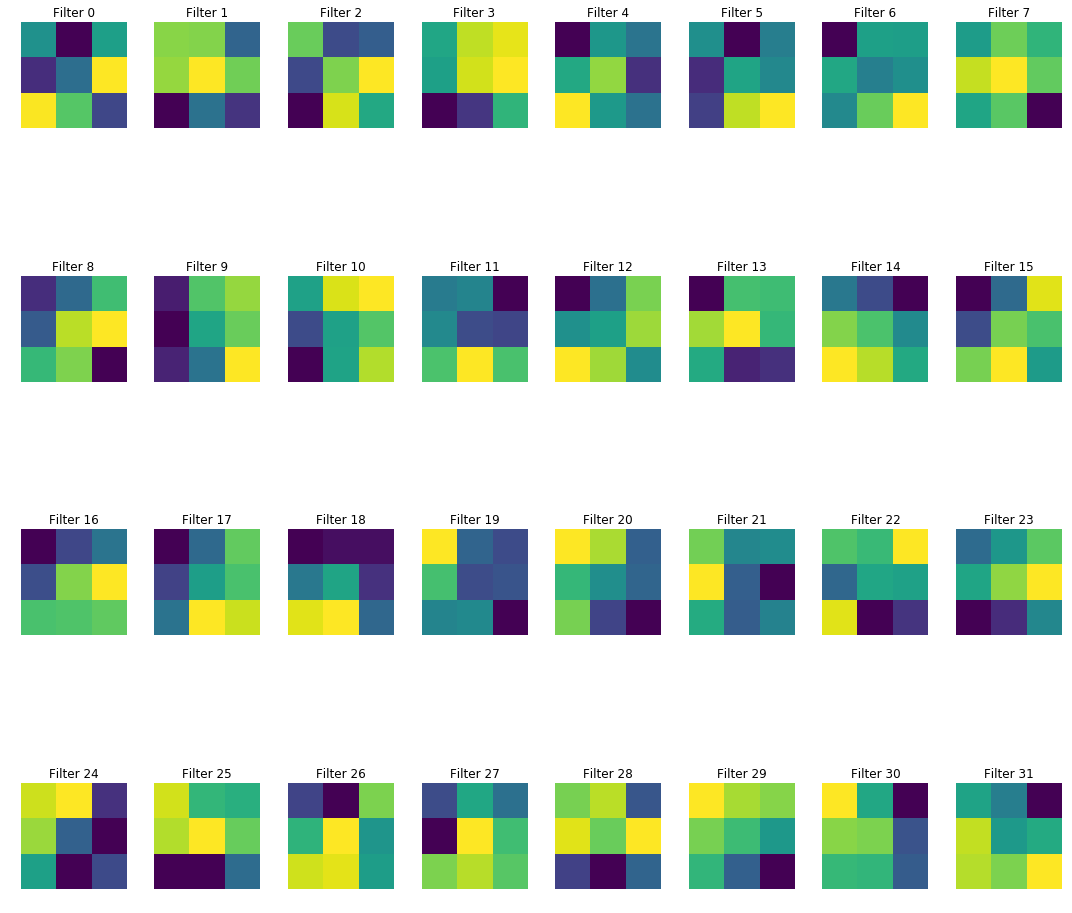

In [10]:
print(model.layers[1].__class__.__name__)

filter1 = np.array(model.layers[0].get_weights())
print(filter1[0].shape)

f, axarr = plt.subplots(4, 8, figsize=(15,15))
for i in range(8):
    for j in range(4):  # 32 layers at first level
        axarr[j, i].imshow(filter1[0][:,:,0,i+j*8])
        axarr[j, i].set_title("Filter {}".format(i+j*8))
        axarr[j, i].axis('off')
plt.tight_layout()
plt.show()

(3, 3, 32, 64)


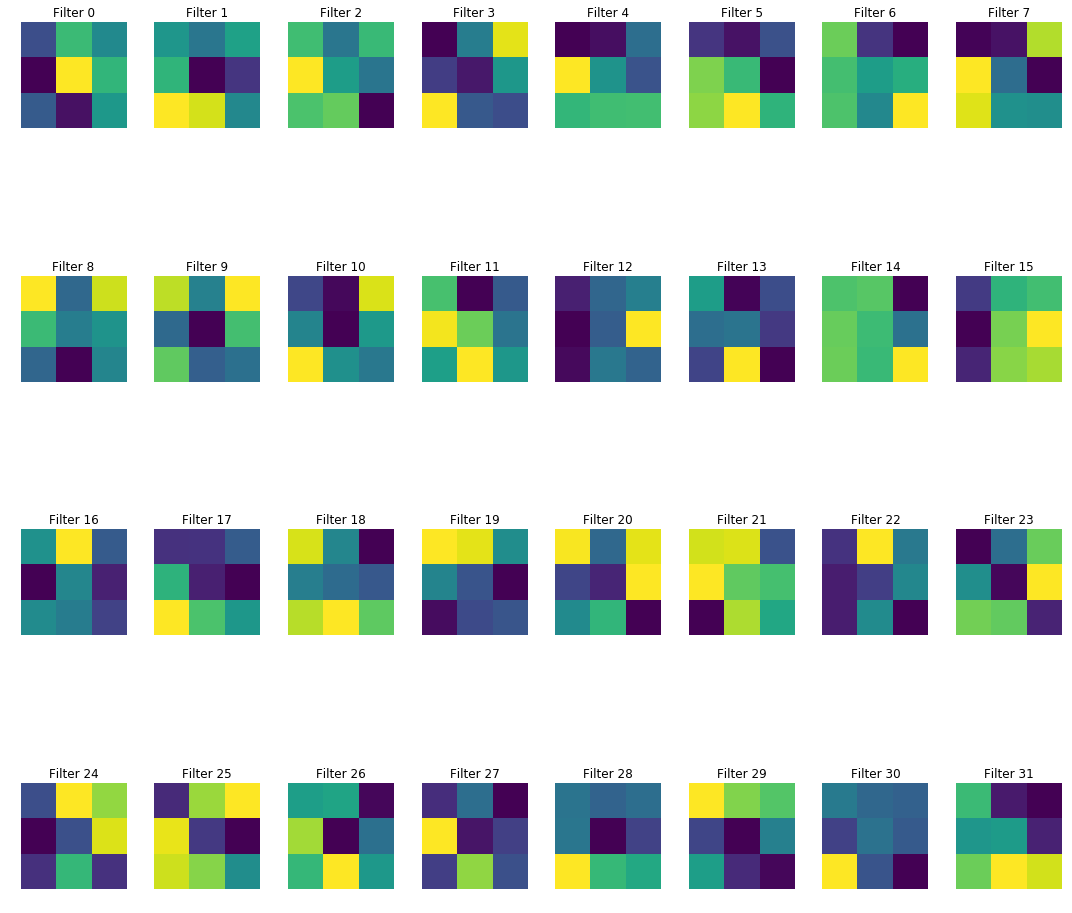

In [11]:
filter2 = np.array(model.layers[1].get_weights())
print(filter2[0].shape)

f, axarr = plt.subplots(4, 8, figsize=(15,15))
for i in range(8):
    for j in range(4):  # 32 layers at first level
        axarr[j, i].imshow(filter2[0][:,:,i+j*8, 32])
        axarr[j, i].set_title("Filter {}".format(i+j*8))
        axarr[j, i].axis('off')
plt.tight_layout()
plt.show()

In our case, it's less visible because our filters are smaller (only 3x3) but we can see that the filter 3, 4 or 5 from the first layer should detect horizontal lines. Let's use it to explore the output thru this filter. With Keras we can extract the output at every level with the following snippet

In [12]:
conv1_layer_model = Model(inputs=model.input,
                          outputs=model.get_layer("conv1").output)
conv2_layer_model = Model(inputs=model.input,
                          outputs=model.get_layer("conv2").output)
mpool_layer_model = Model(inputs=model.input,
                          outputs=model.get_layer("MaxPool").output)
flat_layer_model = Model(inputs=model.input,
                          outputs=model.get_layer("flat").output)

In [13]:
index_data = 32

data_to_predict = x_test[index_data].reshape(1, 28, 28, 1)
out_1 = conv1_layer_model.predict(data_to_predict)
out_2 = conv2_layer_model.predict(data_to_predict)
out_3 = mpool_layer_model.predict(data_to_predict)
out_4 = flat_layer_model.predict(data_to_predict)

print(data_to_predict.shape)
print(out_1.shape)
print(out_2.shape)
print(out_3.shape)
print(out_4.shape)

(1, 28, 28, 1)
(1, 28, 28, 32)
(1, 28, 28, 64)
(1, 14, 14, 64)
(1, 12544)


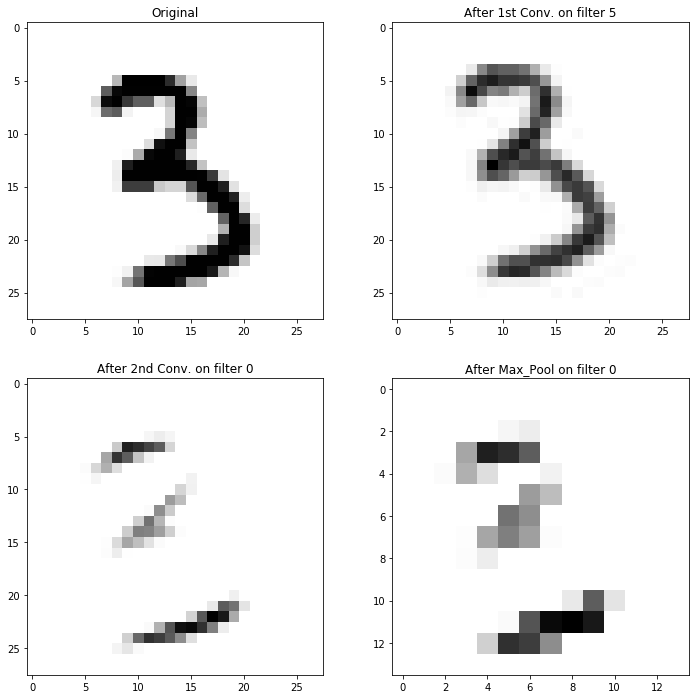

In [14]:
filter_1 = 5 # [0 => 31]
filter_2 = 0 # [0 => 63]

fig = plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.imshow(data_to_predict[0, :, :, 0], cmap='Greys')
plt.title("Original")
plt.subplot(222)
plt.imshow(out_1[0, :, :, filter_1], cmap='Greys',interpolation='nearest')
plt.title("After 1st Conv. on filter {}".format(filter_1))
plt.subplot(223)
plt.imshow(out_2[0, :, :, filter_2], cmap='Greys',interpolation='nearest')
plt.title("After 2nd Conv. on filter {}".format(filter_2))
plt.subplot(224)
plt.imshow(out_3[0, :, :, filter_2], cmap='Greys',interpolation='nearest')
plt.title("After Max_Pool on filter {}".format(filter_2))
plt.show()

As expected, we can see that after the first layer, the more horizontal the line is, the darker the output is. After the second convolution, it's again more visibel and the MaxPooling Layer is reducing the size of the picture and just keep the most visible horizontal lines.

### Conclusion

With multiple filters, a convolutionnal is able to provide as output the list of existing features. After the DNN is on ly used  to classify it based on the list of features. For example, a Zero must contrain a loop like a 8. But 8 must have 2 of them. If the NN get as input "2" loops, it will predict an 8, if there is 1, it will predict 0. Of course it can also be 6 or 9 but the "extension" of both number will activate other outputs in the NN.